In [27]:
# Load libraries



import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, timedelta
from IPython.display import HTML
from matplotlib import cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from pandas.io import sql
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sqlalchemy import create_engine
import csv
import numpy as np
import pandas as pd 
import patsy
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import graph_objs
import psycopg2 as psy
import scipy
import seaborn as sns
import sklearn
py.sign_in('ajbentley', 'zjfu2vasav')

In [28]:
df_filled = pd.read_csv("/Users/ajbentley/GA-DSI/curriculum/week-12/\
1.0-morning-challenge-viz/filled.csv")

df_filled.info()
df_filled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
timestamp             6 non-null object
rc_amount             6 non-null float64
offerUnits            6 non-null object
offerAmount           6 non-null float64
qualifying_rc_date    6 non-null object
adjustment_date       6 non-null object
days_to_adjust        6 non-null int64
expiryDate            6 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 456.0+ bytes


,timestamp,rc_amount,offerUnits,offerAmount,qualifying_rc_date,adjustment_date,days_to_adjust,expiryDate
0,2013-06-14 05:48:16,30.0,credit,8.0,2013-06-14 18:53:32,2013-06-20 12:20:21,5,2013-06-19 05:48:16
1,2013-06-20 07:11:31,50.0,credit,15.0,2013-06-20 19:18:46,2013-06-30 13:52:36,9,2013-06-25 07:11:31
2,2013-06-27 07:19:29,20.0,credit,5.0,2013-06-27 09:24:36,2013-07-04 16:37:55,7,2013-07-12 07:19:29
3,2013-07-15 06:09:24,20.0,credit,5.0,2013-07-15 16:03:32,2013-07-19 12:33:46,3,2013-07-30 06:09:24
4,2013-08-19 06:21:39,50.0,sms,15.0,2013-08-19 13:53:37,2013-08-22 19:41:10,3,2013-08-24 06:21:39


In [29]:
df_notf = pd.read_csv("/Users/ajbentley/GA-DSI/curriculum/week-12/\
1.0-morning-challenge-viz/not_filled.csv")

df_notf.info()
df_notf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
timestamp              1 non-null object
rc_amount              1 non-null float64
offerUnits             1 non-null object
offerAmount            1 non-null float64
qualifying_recharge    1 non-null bool
expiryDate             1 non-null object
dtypes: bool(1), float64(2), object(3)
memory usage: 113.0+ bytes


,timestamp,rc_amount,offerUnits,offerAmount,qualifying_recharge,expiryDate
0,2013-08-01 05:50:36,20.0,credit,5.0,True,2013-08-16 05:50:36


In [30]:
df_rech = pd.read_csv("/Users/ajbentley/GA-DSI/curriculum/week-12/\
1.0-morning-challenge-viz/recharges.csv")

df_rech.info()
df_rech.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
timestamp        35 non-null object
voucher_label    34 non-null object
voucher_value    35 non-null float64
dtypes: float64(1), object(2)
memory usage: 912.0+ bytes


,timestamp,voucher_label,voucher_value
0,2013-05-04 00:32:16,SELLER,50.0
1,2013-05-09 02:14:26,BODCELU,20.0
2,2013-05-11 21:32:55,SELLER,50.0
3,2013-05-18 16:11:50,WALTMART,50.0
4,2013-05-20 14:43:52,SELLER,50.0


In [31]:
df_balance = pd.read_csv("/Users/ajbentley/GA-DSI/curriculum/week-12/\
1.0-morning-challenge-viz/balance.csv")

df_balance.info()
df_balance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
timestamp    218 non-null object
balance      218 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


,timestamp,balance
0,2013-05-01 05:00:01,28.559999
1,2013-05-02 05:00:01,23.209999
2,2013-05-03 05:00:01,18.450001
3,2013-05-04 00:33:44,8.920000
4,2013-05-04 00:33:45,58.919998


In [32]:
df_use = pd.read_csv("/Users/ajbentley/GA-DSI/curriculum/week-12/\
1.0-morning-challenge-viz/usage.csv")

df_use.info()
df_use.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
timestamp                             191 non-null object
inbound_sms_count                     191 non-null int64
inbound_vc_minutes                    191 non-null float64
outbound_sms_count                    191 non-null float64
outbound_vc_minutes                   191 non-null float64
in_network_inbound_sms_count          191 non-null int64
out_of_network_inbound_sms_count      191 non-null int64
in_network_outbound_sms_count         191 non-null int64
out_of_network_outbound_sms_count     191 non-null float64
in_network_inbound_vc_minutes         191 non-null int64
out_of_network_inbound_vc_minutes     191 non-null float64
in_network_outbound_vc_minutes        191 non-null int64
out_of_network_outbound_vc_minutes    191 non-null float64
dtypes: float64(6), int64(6), object(1)
memory usage: 19.5+ KB


,timestamp,inbound_sms_count,inbound_vc_minutes,outbound_sms_count,outbound_vc_minutes,in_network_inbound_sms_count,out_of_network_inbound_sms_count,in_network_outbound_sms_count,out_of_network_outbound_sms_count,in_network_inbound_vc_minutes,out_of_network_inbound_vc_minutes,in_network_outbound_vc_minutes,out_of_network_outbound_vc_minutes
0,2013-03-31,0,5.050000,0.0,0.700000,0,0,0,0.0,4,1.050000,0,0.700000
1,2013-04-01,0,4.583333,0.0,0.666667,0,0,0,0.0,4,0.583333,0,0.666667
2,2013-04-02,0,1.866667,0.0,3.750000,0,0,0,0.0,1,0.866667,2,1.750000
3,2013-04-03,0,0.000000,0.0,0.733333,0,0,0,0.0,0,0.000000,0,0.733333
4,2013-04-04,0,0.000000,0.0,1.533333,0,0,0,0.0,0,0.000000,0,1.533333


In [33]:
use_sum = pd.Series(df_use.sum())

use_sum

timestamp                             2013-03-312013-04-012013-04-022013-04-032013-0...
inbound_sms_count                                                                    68
inbound_vc_minutes                                                              449.967
outbound_sms_count                                                                  125
outbound_vc_minutes                                                             675.067
in_network_inbound_sms_count                                                         32
out_of_network_inbound_sms_count                                                     36
in_network_outbound_sms_count                                                        60
out_of_network_outbound_sms_count                                                    65
in_network_inbound_vc_minutes                                                       195
out_of_network_inbound_vc_minutes                                               254.967
in_network_outbound_vc_minutes  

In [34]:
dfu_pp = pd.DataFrame(df_use)

In [35]:
dfu_pp.pop('timestamp');
dfu_pp.drop(['in_network_inbound_sms_count','out_of_network_inbound_sms_count',\
             'in_network_outbound_sms_count','out_of_network_outbound_sms_count'],\
           axis=1, inplace=True)



In [36]:
from sklearn import preprocessing
scaler = StandardScaler()
dfu_scaled = pd.DataFrame(scaler.fit_transform(dfu_pp), columns=dfu_pp.columns)


In [38]:
# pairplot of in vs out
import pandas as pd
dataframe = pd.DataFrame(dfu_scaled)

fig = FF.create_scatterplotmatrix(dataframe, diag='box', index='inbound_sms_count',
                                  height=800, width=800)
py.iplot(fig, filename='Box plots along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]    [ (1,6) x6,y6 ]    [ (1,7) x7,y7 ]  
[ (2,1) x8,y8 ]    [ (2,2) x9,y9 ]    [ (2,3) x10,y10 ]  [ (2,4) x11,y11 ]  [ (2,5) x12,y12 ]  [ (2,6) x13,y13 ]  [ (2,7) x14,y14 ]
[ (3,1) x15,y15 ]  [ (3,2) x16,y16 ]  [ (3,3) x17,y17 ]  [ (3,4) x18,y18 ]  [ (3,5) x19,y19 ]  [ (3,6) x20,y20 ]  [ (3,7) x21,y21 ]
[ (4,1) x22,y22 ]  [ (4,2) x23,y23 ]  [ (4,3) x24,y24 ]  [ (4,4) x25,y25 ]  [ (4,5) x26,y26 ]  [ (4,6) x27,y27 ]  [ (4,7) x28,y28 ]
[ (5,1) x29,y29 ]  [ (5,2) x30,y30 ]  [ (5,3) x31,y31 ]  [ (5,4) x32,y32 ]  [ (5,5) x33,y33 ]  [ (5,6) x34,y34 ]  [ (5,7) x35,y35 ]
[ (6,1) x36,y36 ]  [ (6,2) x37,y37 ]  [ (6,3) x38,y38 ]  [ (6,4) x39,y39 ]  [ (6,5) x40,y40 ]  [ (6,6) x41,y41 ]  [ (6,7) x42,y42 ]
[ (7,1) x43,y43 ]  [ (7,2) x44,y44 ]  [ (7,3) x45,y45 ]  [ (7,4) x46,y46 ]  [ (7,5) x47,y47 ]  [ (7,6) x48,y48 ]  [ (7,7) x49,y49 ]



NameError: name 'dfu_scaled' is not defined

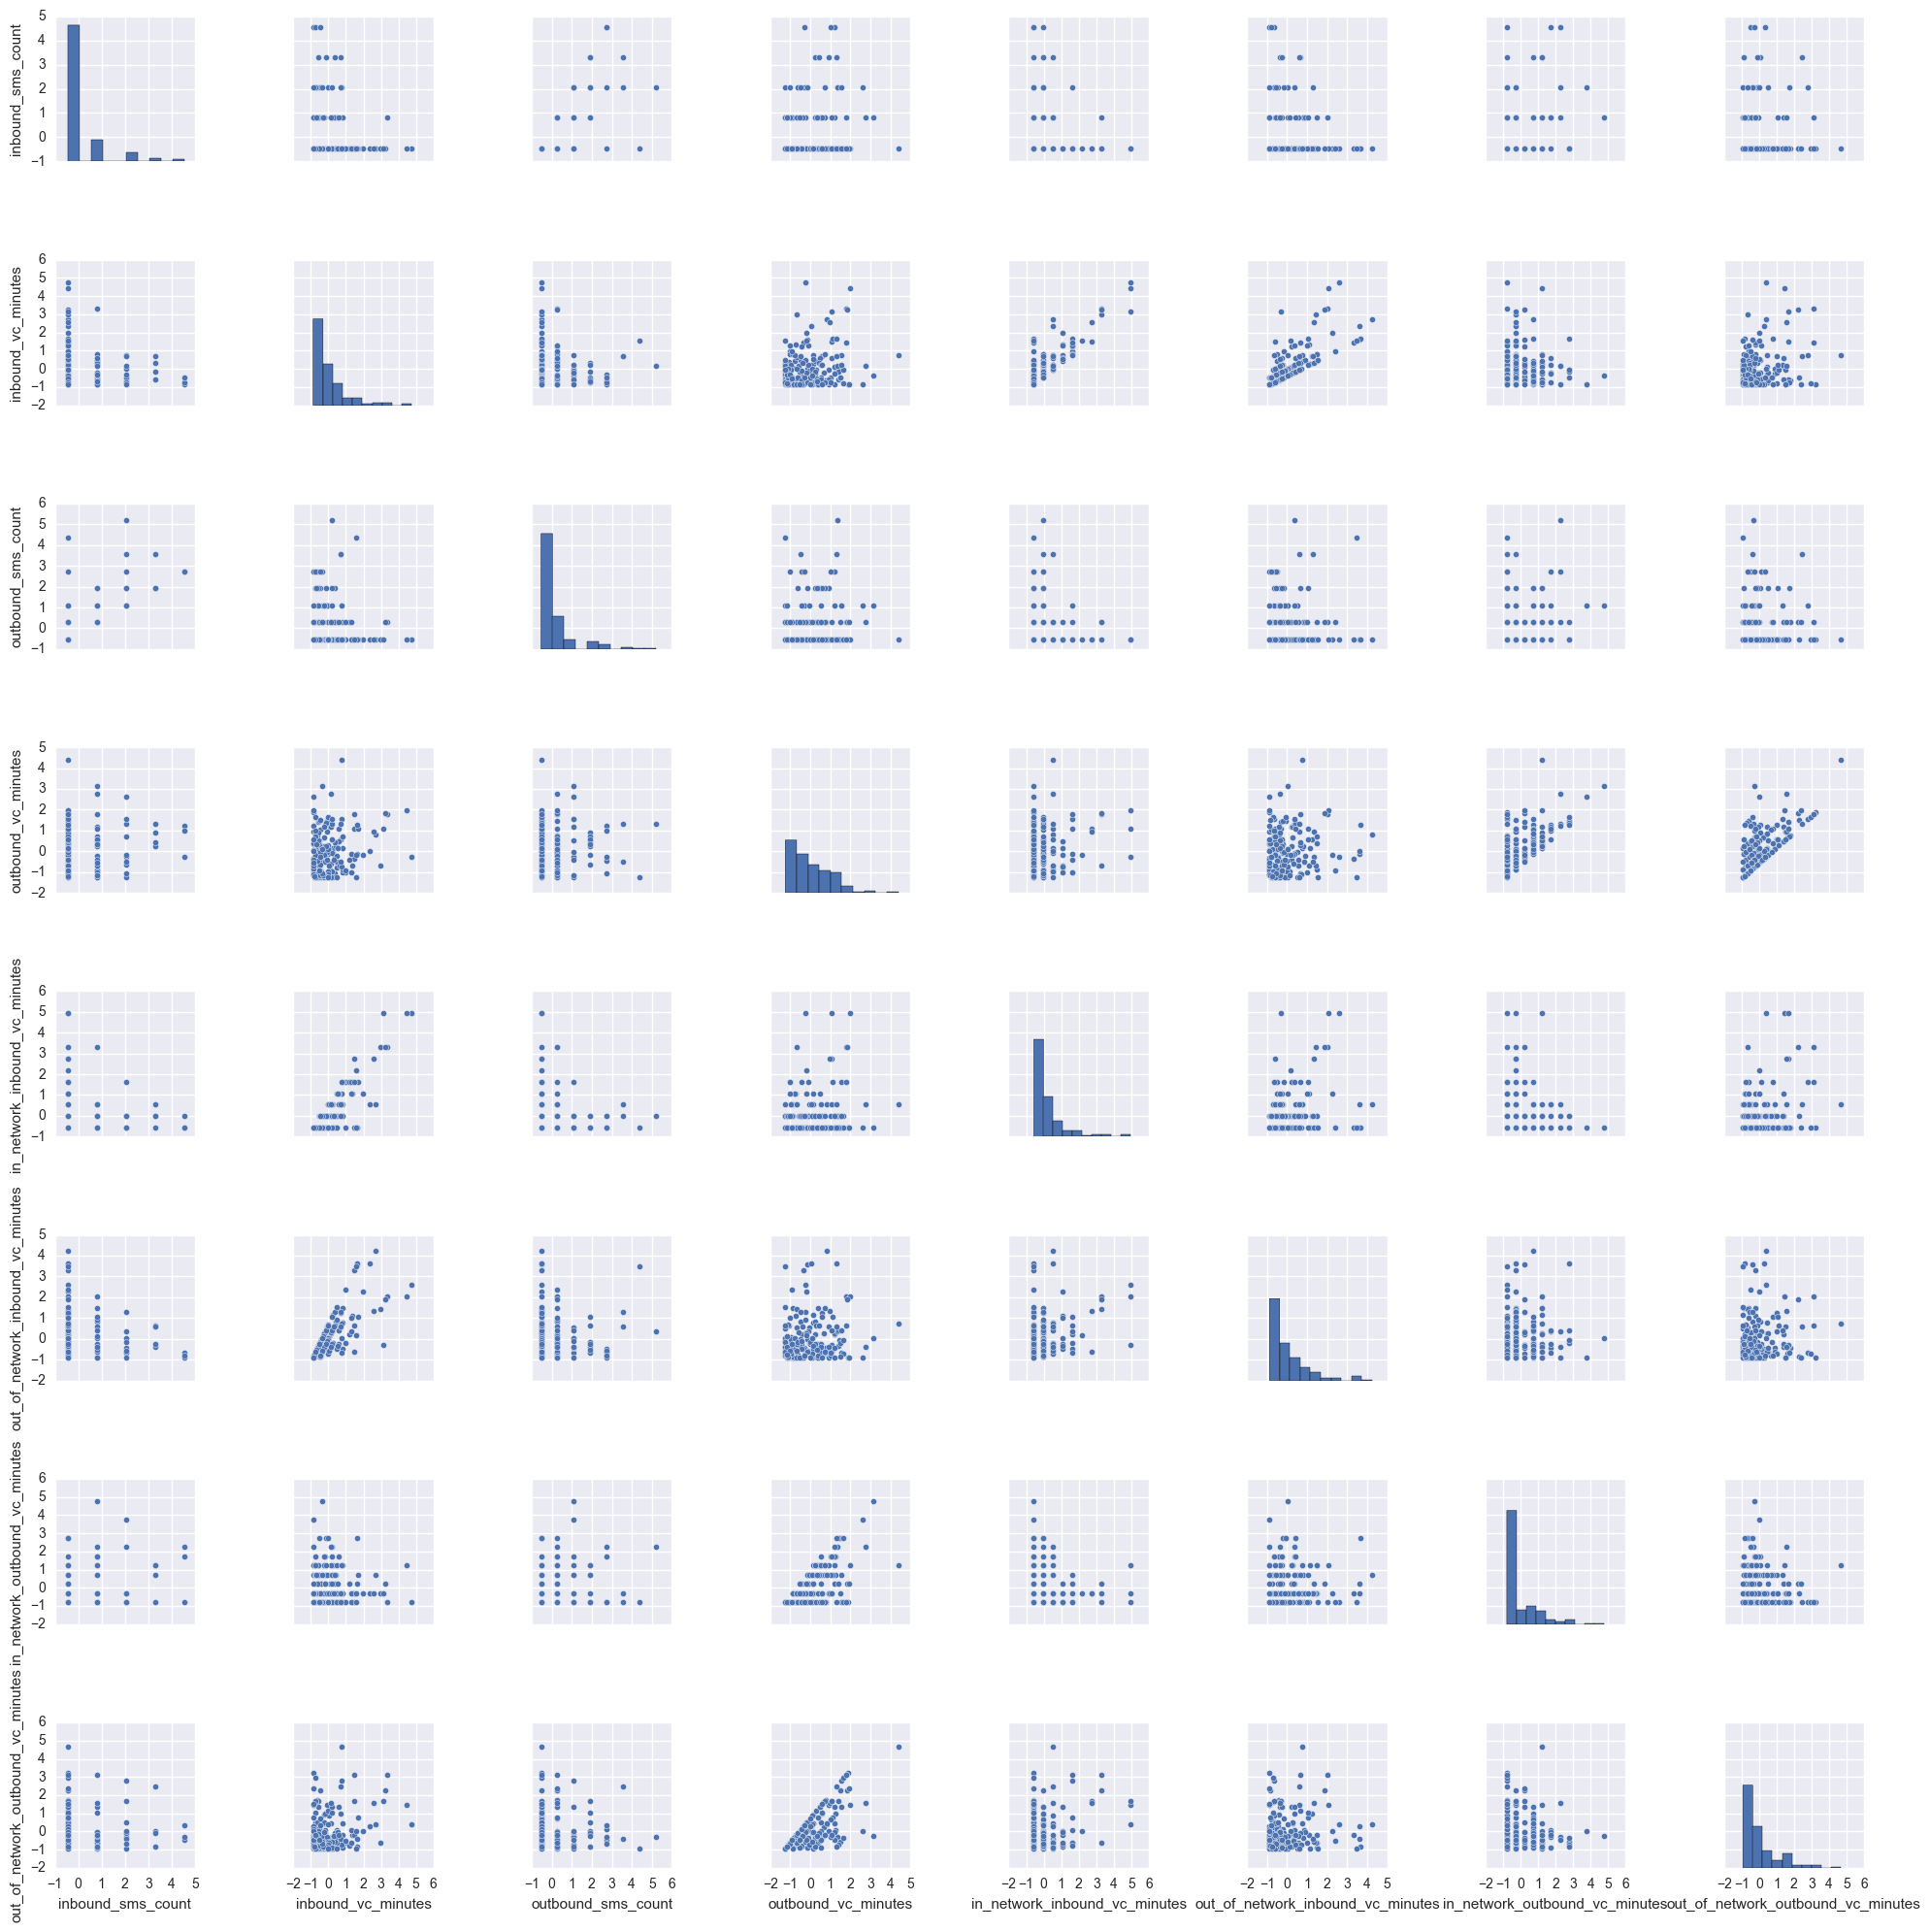

In [20]:
sns.pairplot(dfu_scaled)

# seaborn.pairplot(data, hue=None, hue_order=None, palette=None,\
# vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist',\
# markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)

In [1]:
import pandas_datareader.data as web
from datetime import datetime as dt

start = dt(2014, 12, 4)
end = dt(2016, 12, 4)

In [9]:
fb = web.DataReader('FB','google', start, end)
fb['2014'].describe()

,Open,High,Low,Close,Volume
count,19.000000,19.000000,19.000000,19.000000,1.900000e+01
mean,77.982632,78.965263,77.315263,78.086316,2.470719e+07
std,2.306498,2.026799,2.195423,2.055395,9.356009e+06
min,74.830000,75.550000,74.590000,74.690000,7.685481e+06
25%,76.185000,77.320000,75.380000,76.440000,1.712817e+07
50%,77.160000,78.580000,76.560000,77.830000,2.573385e+07
75%,79.965000,80.775000,79.405000,79.950000,3.147518e+07
max,82.020000,82.170000,80.750000,81.450000,4.333499e+07


In [13]:
fb['2016'].describe()

,Open,High,Low,Close,Volume
count,233.000000,233.000000,233.000000,233.000000,2.330000e+02
mean,116.976695,117.994034,115.739313,116.929013,2.599500e+07
std,9.215559,8.975902,9.563824,9.239977,1.500912e+07
min,92.830000,95.000000,89.370000,94.160000,8.658605e+06
25%,111.210000,112.450000,109.750000,111.020000,1.664596e+07
50%,117.740000,118.600000,116.700000,117.650000,2.109265e+07
75%,124.060000,124.920000,123.630000,124.310000,3.033144e+07
max,133.500000,133.500000,132.220000,133.280000,1.070841e+08


In [22]:
fb[['Close']].resample('W').agg(['max'])


,Close
,max
Date,
2014-12-07,76.36
2014-12-14,77.83
2014-12-21,79.88
2014-12-28,81.45
2015-01-04,80.02
2015-01-11,78.18
2015-01-18,76.72
2015-01-25,77.83


In [23]:
fb[['Close']].resample('D').agg(['max'])

,Close
,max
Date,
2014-12-04,75.24
2014-12-05,76.36
2014-12-06,NaN
2014-12-07,NaN
2014-12-08,76.52
2014-12-09,76.84
2014-12-10,76.18
2014-12-11,77.73


In [ ]:
fb[['Close']].resample('W').agg(['max'])